Accuracy LogisticRegression Model: 66.66666666666666
Accuracy Naive Bayes Model: 77.77777777777779


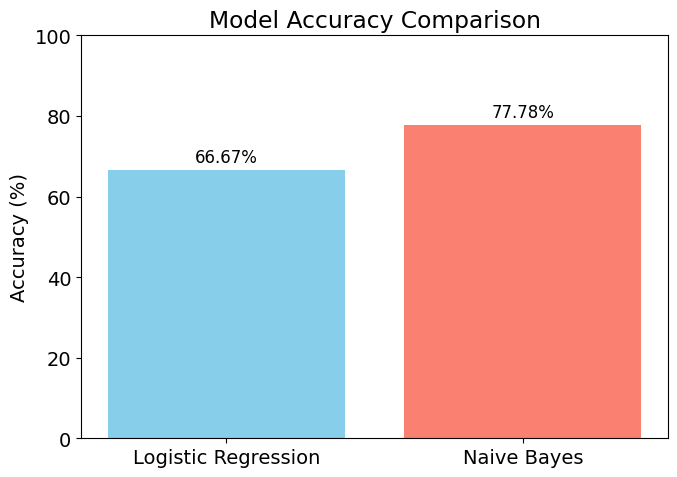

In [3]:

# Logistic Regression and Naive Bayes Classification Example
# Author: [Arsalan Modirkhazeni]
# Date: 2025-10-20
# Description: This script loads a dataset, preprocesses it, and compares the accuracy of Logistic Regression and Naive Bayes classifiers.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Set default font size for plots
plt.rc("font", size=14)

# Column names for the dataset
column_names = [
	'Age', 'Workclass', 'Financial Weight', 'Education', 'Education-num', 'Marital-Status',
	'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss',
	'Hour-per-week', 'Native-country', 'Class'
]

# Load the dataset
data_path = r"Data1.csv"  # Update this path as needed
df = pd.read_csv(data_path, names=column_names)

# Remove leading/trailing spaces from string columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Replace missing value placeholders with NaN
df = df.replace('[?]', np.nan, regex=True)

# Encode categorical variables to numeric values
df['Sex'] = df['Sex'].map({'Female': 0, 'Male': 1})
df['Class'] = df['Class'].map({'<=50K': 0, '>50K': 1})
df['Workclass'] = df['Workclass'].map({
	'Federal-gov': 1, 'Local-gov': 2, 'Private': 3, 'Self-emp-inc': 4,
	'Self-emp-not-inc': 5, 'State-gov': 6, 'Without-pay': 7
})
df['Marital-Status'] = df['Marital-Status'].map({
	'Divorced': 1, 'Married-AF-spouse': 2, 'Married-civ-spouse': 3,
	'Married-spouse-absent': 4, 'Never-married': 5, 'Separated': 6, 'Widowed': 7
})
df['Occupation'] = df['Occupation'].map({
	'Adm-clerical': 1, 'Armed-Forces': 2, 'Craft-repair': 3, 'Exec-managerial': 4,
	'Farming-fishing': 6, 'Handlers-cleaners': 7, 'Machine-op-inspct': 8,
	'Other-service': 9, 'Priv-house-serv': 10, 'Prof-specialty': 11,
	'Protective-serv': 12, 'Sales': 13, 'Tech-support': 14, 'Transport-moving': 15
})
df['Relationship'] = df['Relationship'].map({
	'Husband': 1, 'Not-in-family': 2, 'Other-relative': 3,
	'Own-child': 4, 'Unmarried': 5, 'Wife': 6
})
df['Race'] = df['Race'].map({
	'Amer-Indian-Eskimo': 1, 'Asian-Pac-Islander': 2, 'Black': 3,
	'Other': 4, 'White': 5
})
df['Native-country'] = df['Native-country'].map({
	'Cambodia': 1, 'Canada': 2, 'China': 3, 'Columbia': 4, 'Cuba': 5,
	'Dominican-Republic': 6, 'Ecuador': 7, 'El-Salvador': 8, 'England': 9,
	'France': 10, 'Germany': 11, 'Greece': 12, 'Guatemala': 13, 'Haiti': 14,
	'Holand-Netherlands': 15, 'Honduras': 16, 'Hong': 17, 'Hungary': 18,
	'India': 19, 'Iran': 20, 'Ireland': 21, 'Italy': 22, 'Jamaica': 23,
	'Japan': 24, 'Laos': 25, 'Mexico': 26, 'Nicaragua': 27,
	'Outlying-US(Guam-USVI-etc)': 28, 'Peru': 29, 'Philippines': 30,
	'Poland': 31, 'Portugal': 32, 'Puertoc-Rico': 33, 'Scotland': 34,
	'South': 35, 'Taiwan': 36, 'Thailand': 37, 'Trinadad&Tobago': 38,
	'United-States': 39, 'Vietnam': 40, 'Yugoslavia': 41
})

# Drop the 'Education' column (redundant with 'Education-num')
df = df.drop('Education', axis=1)

# Remove rows with missing values
df = df.dropna()

# Prepare feature matrix X and target vector y
data = df.values
X = data[:, 0:13].astype(int)  # Features
y = data[:, 13].astype(int)    # Target

# Split data into training and test sets
test_size = 0.33
random_seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)

# Train and evaluate Logistic Regression model
logreg_model = LogisticRegression(max_iter=3000)
logreg_model.fit(X_train, y_train)
logreg_accuracy = logreg_model.score(X_test, y_test) * 100

print("Accuracy LogisticRegression Model:", logreg_accuracy)

# Train and evaluate Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_accuracy = nb_model.score(X_test, y_test) * 100

print("Accuracy Naive Bayes Model:", nb_accuracy)

# Plotting the accuracy comparison
models = ['Logistic Regression', 'Naive Bayes']
accuracies = [logreg_accuracy, nb_accuracy]

plt.figure(figsize=(7, 5))
bars = plt.bar(models, accuracies, color=['skyblue', 'salmon'])
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')

# Annotate bars with accuracy values
for bar, acc in zip(bars, accuracies):
	plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{acc:.2f}%',
			 ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()
